# Simple SGD line example, self-coded

In [32]:
%matplotlib inline
import math,sys,os,numpy as np
import numpy as np
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)


u'%.4f'

First I guess, we define a line

In [17]:
def line(a, b, x):
    return a * x + b
    
true_a = 5
true_b = 1

Generate N random points on the line

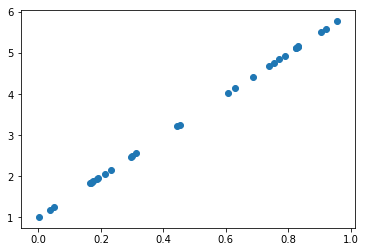

In [22]:
N_random_points_on_the_line = 30

random_x_matrix = np.random.random(N_random_points_on_the_line)
random_true_y_matrix = line(true_a, true_b, random_x)

plt.scatter(random_x, random_true_y)

Now, we somehow have to define a loss function for guesses against that line

In [26]:
def sse(random_true_y_matrix, y_predicted):
    return ((random_true_y_matrix - y_predicted)**2).sum()
    
def loss_function(a_guess, b_guess, random_x_matrix, random_true_y_matrix):
    return sse(random_true_y_matrix, line(a_guess, b_guess, random_x_matrix))
    
def average_loss(a_guess, b_guess, random_x_matrix, random_true_y_matrix):
    return np.sqrt(loss_function(a_guess, b_guess, random_x_matrix, random_true_y_matrix) / N_random_points_on_the_line)
    
a_guess = 20
b_guess = 4

average_loss(a_guess, b_guess, random_x_matrix, random_true_y_matrix)

10.877598533400905

Set learning rate and calculate deeeerivatives!

In [35]:
learning_rate = 0.01

#dedb = d[y-(ax+b)**2, b] = 2(ax + b - y) = 2 (y_predicted - y)
#deda = d[y-(ax+b)**2, a] = 2x(ax + b - y) = x * dedb

def update_one_step():
    global a_guess, b_guess
    predicted_y_matrix = line(a_guess, b_guess, random_x_matrix)
    dedb = 2 * (predicted_y_matrix - random_true_y_matrix)
    deda = random_x_matrix * dedb
    a_guess -= learning_rate * dedb.mean()
    b_guess -= learning_rate * deda.mean()

Plot that!

In [36]:
figure = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(random_x_matrix, random_true_y_matrix)
lineplot, = plt.plot(random_x_matrix, line(a_guess, b_guess, random_x_matrix))
plt.close()

def animate(i):
    lineplot.set_ydata(line(a_guess, b_guess, random_x_matrix))
    for i in range(10): update_one_step()
    return lineplot,
    
ourCoolAnimation = animation.FuncAnimation(figure, animate, np.arange(0, 40), interval=100)
ourCoolAnimation